In [21]:
!pip install pandas_datareader
!pip install yfinance
!pip install matplotlib
!pip install researchpy
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**3.1 CHALLENGE - IS AMD MEAN RETURN HIGHER THAN INTEL MEAN RETURN?**

Get the price data of both AMD and Intel since 01/01/2017

In [12]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np

# Getting price data and selecting adjusted price columns:
sprices = pdr.get_data_yahoo(['AMD','INTC'], start="01/01/2017", end="08/15/2022", interval="m")
sprices=sprices['Adj Close']

In [13]:
# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()

Calcultaing std error from the difference of the calculated means. Then, we calculate the t-statistic with the calculated std

In [14]:
# Stating the hypotheses: 
# H0: (mean(rAMD) - mean(rINTEL)) = 0
# Ha: (mean(rAMD) - mean(rINTEL)) <> 0

# Calculating the standard error of the difference of the means:
N = sr['AMD'].count()
amdvar = sr['AMD'].var()
intelvar = sr['INTC'].var()
sediff = np.sqrt((1/N) * (amdvar + intelvar ) )

# Calculating the t-Statistic:
t = (sr['AMD'].mean() - sr['INTC'].mean()) / sediff
t

1.451439699658151

P-value calculus

In [15]:
from scipy import stats as st
# The st.t.sf function calculates the 1-tailed pvalue, so we multiply it by 2 to get the 2-tailed pvalue
# the degrees of freedom for 2-independent-means t-test is calculated with the following formula:
df = ( ((N-1) / N**2) * (amdvar + intelvar)**2  / ( (amdvar/N)**2 + (intelvar/N)**2  ) )
# Now we calculate the pvalue with the t and df:
pvalue = 2 * st.t.sf(np.abs(t), df)
pvalue

0.1500177604299986

T Test using function

In [16]:
# Using the ttest_ind function from stats:
st.ttest_ind(sr['AMD'],sr['INTC'],equal_var=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

Ttest_indResult(statistic=1.4514396996581511, pvalue=0.1500177604299985)

T test using researchpy function

In [22]:
import researchpy as rp
# Using the ttest function from researchpy:
rp.ttest(sr['AMD'],sr['INTC'],equal_variances=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

(   Variable      N      Mean        SD        SE  95% Conf.  Interval
 0       AMD   67.0  0.033208  0.162019  0.019794  -0.006312  0.072727
 1      INTC   67.0  0.001539  0.075133  0.009179  -0.016787  0.019866
 2  combined  134.0  0.017373  0.126808  0.010955  -0.004294  0.039041,
                Welch's t-test  results
 0  Difference (AMD - INTC) =    0.0317
 1       Degrees of freedom =   93.9534
 2                        t =    1.4514
 3    Two side test p value =    0.1500
 4   Difference < 0 p value =    0.9250
 5   Difference > 0 p value =    0.0750
 6                Cohen's d =    0.2508
 7                Hedge's g =    0.2493
 8            Glass's delta =    0.1955
 9              Pearson's r =    0.1481)

**4. MEASURES OF LINEAR RELATIONSHIP**

In [3]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt

# We download price data for Microsoft and the S&P500 index:
prices=yf.download(tickers="MSFT ^GSPC", start="2019-01-01",interval="1mo")
# We select Adjusted closing prices and drop any row with NA values:
adjprices = prices['Adj Close'].dropna()

[*********************100%***********************]  2 of 2 completed


<Figure size 432x288 with 0 Axes>

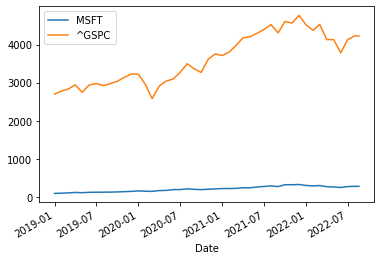

In [4]:
plt.clf()
adjprices.plot(y=['MSFT','^GSPC'])
plt.show()

In [5]:
adjprices['iMSFT'] = adjprices['MSFT'] / adjprices['MSFT'][0]
adjprices['iGSPC'] = adjprices['^GSPC'] / adjprices['^GSPC'][0]

<Figure size 432x288 with 0 Axes>

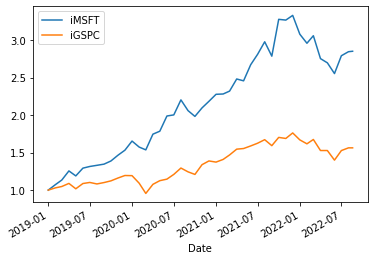

In [6]:
plt.clf()
adjprices.plot(y=['iMSFT','iGSPC'])
plt.show()

In [7]:
r = np.log(adjprices) - np.log(adjprices.shift(1))
# Dropping rows with NA values (the first month will have NAs)
r = r.dropna()
# Selecting only 2 columns (out of the 4 columns):
r = r[['MSFT','^GSPC']]
# Renameing the column names:
r.columns = ['MSFT','GSPC']

In [8]:
r.head()

,MSFT,GSPC
Date,,
2019-02-01,0.070250,0.029296
2019-03-01,0.055671,0.017766
2019-04-01,0.101963,0.038560
2019-05-01,-0.054442,-0.068041
2019-06-01,0.083538,0.066658


<Figure size 432x288 with 0 Axes>

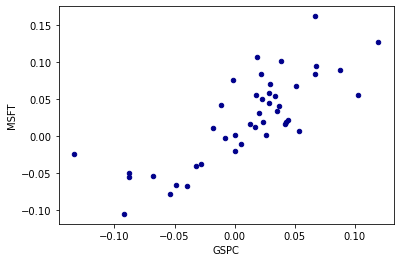

In [9]:
plt.clf()
r.plot.scatter(x='GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 432x288 with 0 Axes>

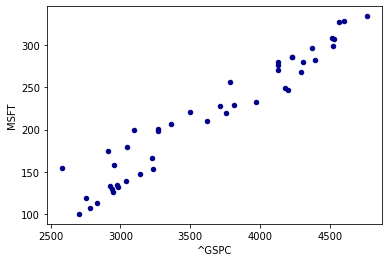

In [10]:
plt.clf()
adjprices.plot.scatter(x='^GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 432x288 with 0 Axes>

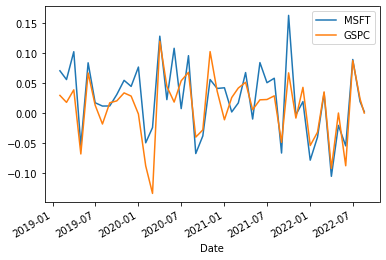

In [23]:
plt.clf()
r.plot(y=['MSFT','GSPC'])
plt.show()

Calculating covariance and correlation

In [24]:
msft_mean = r['MSFT'].mean()
gspc_mean = r['GSPC'].mean()
N = r['GSPC'].count()
sum_of_prod = ((r['MSFT'] - msft_mean) * (r['GSPC'] - gspc_mean) ).sum()  
cov = sum_of_prod / (N-1)
cov

0.0024547020755224486

Covariance using numpy function

In [25]:
covm = np.cov(r['MSFT'],r['GSPC'])
covm

array([[0.00347497, 0.0024547 ],
       [0.0024547 , 0.00277328]])

In [26]:
cov = covm[0,1]
cov

0.002454702075522449

Correlation using numpy function

In [27]:
corr = np.corrcoef(r['MSFT'],r['GSPC'])
corr

array([[1.        , 0.79072691],
       [0.79072691, 1.        ]])

In [28]:
corr2 = cov / (r['MSFT'].std() * r['GSPC'].std())
corr2

0.7907269147987

Correlation and 2-tailes pvalue

In [29]:
from scipy.stats import pearsonr
corr2 = pearsonr(r['MSFT'],r['GSPC'])
corr2

(0.7907269147986998, 1.7083066981982365e-10)